### Dataset seleccionado Red Wine Quality
* Representa un caso real aplicado en la industria alimentario y enológica, donde se busca predecir la calidad del vino a partir de sus caracteristicas fisico-quimicas
* Ademas la problematica es frecuente en empresas vinícolas, laboratorios de control de calidad y centros de investigacion agroalimentaria

### Importar dependencias

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

### Carga del dataset

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Crear una columna de calidad(1 si es buena calidad, 0 si es regular o mala)

In [4]:
df["quality_binary"] = (df["quality"]>=7).astype(int)
df.head(9)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1


### Separar caracteristica y etiqueta

In [5]:
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

### Dividir en entrenamiento y prueba

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Crear y entrenar el arbol de decision

In [ ]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### Evalual el modelo

In [13]:
y_pred = model.predict(X_test)
print(f"""Reporte de clasificación:
{classification_report(y_test, y_pred)}""")
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       277
           1       0.81      0.67      0.73        43

    accuracy                           0.93       320
   macro avg       0.88      0.82      0.85       320
weighted avg       0.93      0.93      0.93       320

Precisión del modelo: 0.934375


### Visualizar el arbol de decision

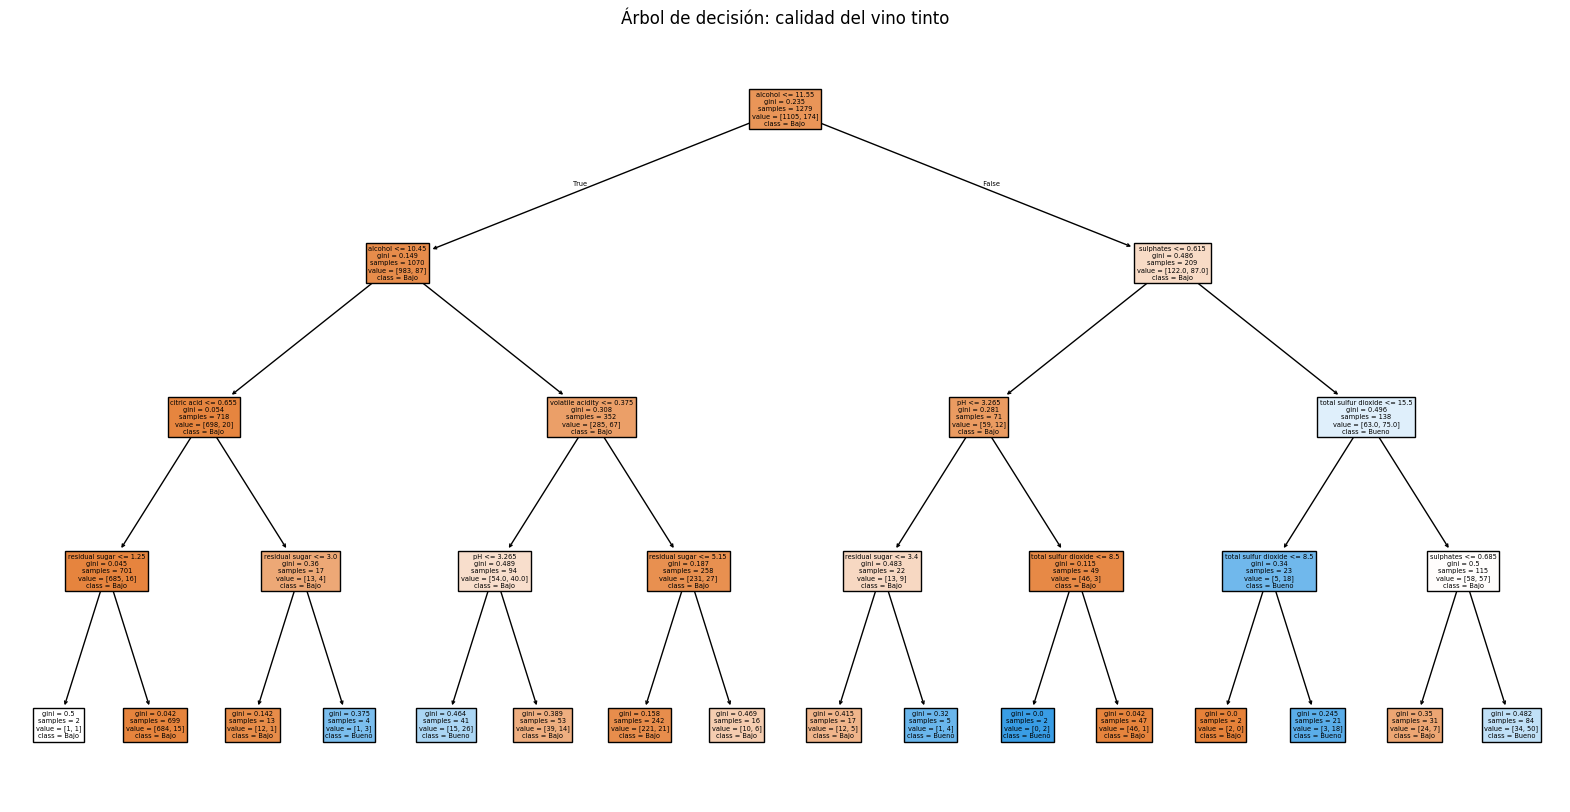

In [14]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=["Bajo", "Bueno"], filled=True)
plt.title("Árbol de decisión: calidad del vino tinto")
plt.show()

### Mostrar importancia de caracteristicas

In [15]:
importances = model.feature_importances_
features = X.columns

### Ordenar las importancias

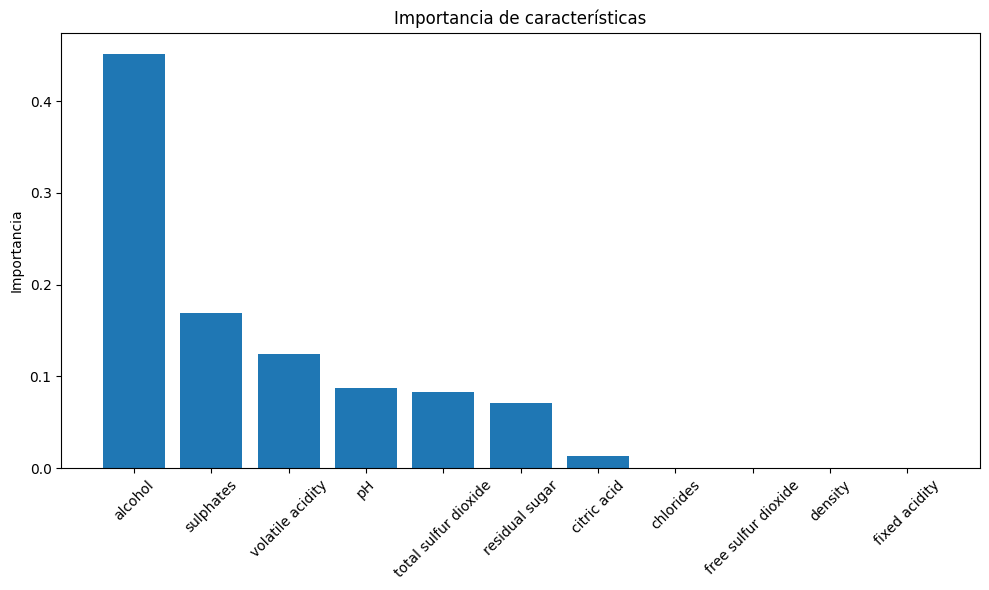

In [16]:
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), features[sorted_idx], rotation=45)
plt.ylabel("Importancia")
plt.title("Importancia de características")
plt.tight_layout()
plt.show()

In [18]:
import joblib

joblib.dump(model,"arbol-vinoTinto.pkl")

['arbol-vinoTinto.pkl']